### All Code Comparison

In [1]:
import os
import numpy as np
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from utils import *
from hamming_channel_47 import HammingChannel47
from ldpc_channel import LdpcChannel
import matplotlib.pyplot as plt
import pickle
from ldpc_bpsk_gaussian_system import LdpcBpskGaussianSystem

#### Hamming

In [2]:
# 1. Escolha um valor de p. Utilize p = 0.5,0.2,0.1,0.05,0.02,0.01,0.005,...

snrs_db = np.arange(0, 10.5, 0.5) 
ps = []
R = 4/7
for snr_db in snrs_db:
    ps.append(Ei_N0_to_p(snr_db, R)) 
    
bit_values = [0, 1]
save_folder = "./bit_error_results"
if not os.path.exists(save_folder):
    os.mkdir(save_folder)
method = "hamming"
for p in ps:
    print(f"p = {p}")
    
    # 2. Gere aleatoriamente cerca de 1 milhão de bits de informação
    # 3. Divida em grupos de K bits. Haverá L grupos
    save_path_original = save_folder + f"/{p}-{method}-bits-original.npy"    

    if not os.path.isfile(save_path_original):  
        random_info_bits = np.array(random.choices(bit_values, weights=[1, 1], k = int(1e6))) 
        k = 4
        original_bits_groups = random_info_bits.reshape(-1, k) 
        with open(save_path_original, "wb") as f:
            np.save(f, original_bits_groups)
    else:
        with open(save_path_original, "rb") as f:
            original_bits_groups = np.load(f)
            
    # 4: Gere as L palavras-código correspondentes a cada um dos grupos do item 3
    # 5: Simule o efeito do canal BSC trocando o valor dos bits das palavras código do item anterior 
    # com probabilidade p para todos os bits de todas as L palavras-código, gerando assim L palavras recebidas.
    # 6: Realize o processo de detecção por síndrome para cada uma das L palavras recebidas.
    # 7: Realize o processo de estimação sobre os bits de informação.
    save_path_decoded = save_folder + f"/{p}-{method}-bits-decoded.npy"

    if not os.path.isfile(save_path_decoded):
        hamming_channel = HammingChannel47(p)
        decoded_bits_groups = []
        for i in tqdm(range(original_bits_groups.shape[0])):
            decoded_bits_groups.append(hamming_channel.transmit(original_bits_groups[i])) 
        decoded_bits_groups = np.array(decoded_bits_groups)
        with open(save_path_decoded, 'wb') as f:
            np.save(f, decoded_bits_groups)
    else: 
        with open(save_path_decoded, "rb") as f:
            decoded_bits_groups = np.load(f)

p = 0.14252470370130643


100%|██████████| 250000/250000 [00:24<00:00, 10120.35it/s]


p = 0.12873528209043172


100%|██████████| 250000/250000 [00:23<00:00, 10658.13it/s]


p = 0.11516908862773423


100%|██████████| 250000/250000 [00:23<00:00, 10597.27it/s]


p = 0.10194219854208608


100%|██████████| 250000/250000 [00:23<00:00, 10605.30it/s]


p = 0.0891757908458275


100%|██████████| 250000/250000 [00:23<00:00, 10544.78it/s]


p = 0.07699273024700704


100%|██████████| 250000/250000 [00:23<00:00, 10546.32it/s]


p = 0.06551327242683047


100%|██████████| 250000/250000 [00:23<00:00, 10574.92it/s]


p = 0.05484997901513444


100%|██████████| 250000/250000 [00:23<00:00, 10495.84it/s]


p = 0.04510204743362156


100%|██████████| 250000/250000 [00:23<00:00, 10506.82it/s]


p = 0.03634940131838471


100%|██████████| 250000/250000 [00:23<00:00, 10552.60it/s]


p = 0.028647034206930377


100%|██████████| 250000/250000 [00:24<00:00, 10238.04it/s]


p = 0.022020226921702468


100%|██████████| 250000/250000 [00:23<00:00, 10426.30it/s]


p = 0.016461332099899972


100%|██████████| 250000/250000 [00:23<00:00, 10519.75it/s]


p = 0.011928796627787897


100%|██████████| 250000/250000 [00:23<00:00, 10546.74it/s]


p = 0.008348937375587728


100%|██████████| 250000/250000 [00:23<00:00, 10552.59it/s]


p = 0.005620679255335825


100%|██████████| 250000/250000 [00:23<00:00, 10594.22it/s]


p = 0.0036230245557679064


100%|██████████| 250000/250000 [00:23<00:00, 10632.15it/s]


p = 0.0022245149617428073


100%|██████████| 250000/250000 [00:23<00:00, 10593.08it/s]


p = 0.0012934879727222182


100%|██████████| 250000/250000 [00:23<00:00, 10544.92it/s]


p = 0.0007076603075836241


100%|██████████| 250000/250000 [00:23<00:00, 10534.05it/s]


p = 0.00036161635821507776


100%|██████████| 250000/250000 [00:23<00:00, 10593.20it/s]


In [3]:
save_folder = "./bit_error_results"
info_bit_error_probas = []

for p in ps:
    save_path_original = save_folder + f"/{p}-{method}-bits-original.npy"
    with open(save_path_original, "rb") as f:
        original_bits_groups = np.load(f)

    save_path_decoded = save_folder + f"/{p}-{method}-bits-decoded.npy"
    with open(save_path_decoded, "rb") as f:
        decoded_bits_groups = np.load(f)
        
    original = original_bits_groups.reshape(-1)
    decoded = decoded_bits_groups.reshape(-1)
    info_bit_error_proba = np.not_equal(original, decoded).sum()/len(original)
    info_bit_error_probas.append(info_bit_error_proba)

In [4]:
hamming_errors = info_bit_error_probas

In [5]:
hamming_errors

[0.119098,
 0.101465,
 0.084729,
 0.068658,
 0.055317,
 0.042901,
 0.032453,
 0.022871,
 0.01598,
 0.010913,
 0.006784,
 0.003982,
 0.002243,
 0.001206,
 0.000614,
 0.000249,
 0.000126,
 4.6e-05,
 1.5e-05,
 6e-06,
 2e-06]

### LDPC - Bit Flipping

In [6]:
#4/7 Rate
rate="4/7"
save_folder = "./bit_error_results_47"
hamming=False
dv=3
dc=7
N_values=[1001]
snrs_db = np.arange(0, 10.5, 0.5) 
ps = []
R = 4/7
for snr_db in snrs_db:
    ps.append(Ei_N0_to_p(snr_db, R)) 

In [7]:
def generate_groups(N, N_bits, ps):
    """
    dv = 3 # número de ramos que saem de cada v-node para a camada CND = número de 1s nas colunas
    dc = 7 # número de ramos que saem de cada c-node para a camada VND = número de 1s nas linhas
    N = 98 # tamanho da palavra código
    """
    n_groups = int(N_bits/N)
    if not os.path.exists(save_folder):
        os.mkdir(save_folder)
    method = "ldpc"

    for p in ps:
        save_path_original = save_folder + f"/{N}-{p}-{method}-bits-original.npy"    

        if not os.path.isfile(save_path_original):  
            original_bits_groups = np.zeros((1, N_bits)).reshape(-1, N) 
            with open(save_path_original, "wb") as f:
                np.save(f, original_bits_groups)

        save_path_decoded = save_folder + f"/{N}-{p}-{method}-bits-decoded.npy"
        if not os.path.isfile(save_path_decoded):
            print(f"p = {p}")
            ldpc_channel = LdpcChannel(p, dv, dc, N, iterations=100)
            decoded_bits_groups = []
            for i in tqdm(range(n_groups)):
                decoded_bits_groups.append(ldpc_channel.transmit()) 
            decoded_bits_groups = np.array(decoded_bits_groups)
            with open(save_path_decoded, 'wb') as f:
                np.save(f, decoded_bits_groups)
        else: 
            with open(save_path_decoded, "rb") as f:
                decoded_bits_groups = np.load(f)

def get_info_bit_error_probas(N, ps):
    method = "ldpc"
    info_bit_error_probas = []

    for p in ps:
        save_path_original = save_folder + f"/{N}-{p}-{method}-bits-original.npy"
        with open(save_path_original, "rb") as f:
            original_bits_groups = np.load(f)

        save_path_decoded = save_folder + f"/{N}-{p}-{method}-bits-decoded.npy"
        with open(save_path_decoded, "rb") as f:
            decoded_bits_groups = np.load(f)
            
        original = original_bits_groups.reshape(-1)
        decoded = decoded_bits_groups.reshape(-1)
        info_bit_error_proba = np.not_equal(original, decoded).sum()/len(original)
        info_bit_error_probas.append(info_bit_error_proba)
        
    return info_bit_error_probas

def get_probas_list_ldpc(N_values, ps):
    
    if hamming:
        info_bit_error_probas_hamming = []
        method = "hamming"

        for p in ps:
            save_path_original = save_folder + f"/{p}-{method}-bits-original.npy"
            with open(save_path_original, "rb") as f:
                original_bits_groups = np.load(f)

            save_path_decoded = save_folder + f"/{p}-{method}-bits-decoded.npy"
            with open(save_path_decoded, "rb") as f:
                decoded_bits_groups = np.load(f)
                
            original = original_bits_groups.reshape(-1)
            decoded = decoded_bits_groups.reshape(-1)
            info_bit_error_proba = np.not_equal(original, decoded).sum()/len(original)
            info_bit_error_probas_hamming.append(info_bit_error_proba)
    
    probas_list = []
    
    for N in N_values:
        generate_groups(N=N, N_bits=N*1000, ps=ps)
        info_bit_error_probas = get_info_bit_error_probas(N=N, ps=ps)
        for i in range(len(info_bit_error_probas) - 1):
            if(info_bit_error_probas[i] == 0 and info_bit_error_probas[i+1] > 0):
                info_bit_error_probas[i+1] = 0
        probas_list.append(info_bit_error_probas)
    
    return probas_list

In [8]:
ldpc_bitflipping_errors = get_probas_list_ldpc(N_values, ps)

p = 0.14252470370130643


100%|██████████| 1000/1000 [01:30<00:00, 11.08it/s]


p = 0.12873528209043172


100%|██████████| 1000/1000 [01:29<00:00, 11.14it/s]


p = 0.11516908862773423


100%|██████████| 1000/1000 [01:29<00:00, 11.22it/s]


p = 0.10194219854208608


100%|██████████| 1000/1000 [01:28<00:00, 11.32it/s]


p = 0.0891757908458275


100%|██████████| 1000/1000 [01:27<00:00, 11.43it/s]


p = 0.07699273024700704


100%|██████████| 1000/1000 [01:26<00:00, 11.54it/s]


p = 0.06551327242683047


100%|██████████| 1000/1000 [01:25<00:00, 11.67it/s]


p = 0.05484997901513444


100%|██████████| 1000/1000 [01:24<00:00, 11.84it/s]


p = 0.04510204743362156


100%|██████████| 1000/1000 [01:24<00:00, 11.85it/s]


p = 0.03634940131838471


100%|██████████| 1000/1000 [01:17<00:00, 12.91it/s]


p = 0.028647034206930377


100%|██████████| 1000/1000 [01:01<00:00, 16.32it/s]


p = 0.022020226921702468


100%|██████████| 1000/1000 [00:44<00:00, 22.49it/s]


p = 0.016461332099899972


100%|██████████| 1000/1000 [00:29<00:00, 33.57it/s]


p = 0.011928796627787897


100%|██████████| 1000/1000 [00:19<00:00, 50.77it/s]


p = 0.008348937375587728


100%|██████████| 1000/1000 [00:12<00:00, 82.73it/s]


p = 0.005620679255335825


100%|██████████| 1000/1000 [00:10<00:00, 99.45it/s]


p = 0.0036230245557679064


100%|██████████| 1000/1000 [00:06<00:00, 149.70it/s]


p = 0.0022245149617428073


100%|██████████| 1000/1000 [00:05<00:00, 192.36it/s]


p = 0.0012934879727222182


100%|██████████| 1000/1000 [00:04<00:00, 222.44it/s]


p = 0.0007076603075836241


100%|██████████| 1000/1000 [00:03<00:00, 270.41it/s]


p = 0.00036161635821507776


100%|██████████| 1000/1000 [00:03<00:00, 282.69it/s]


In [9]:
ldpc_bitflipping_errors = ldpc_bitflipping_errors[0]
ldpc_bitflipping_errors

[0.19223576423576424,
 0.17645754245754247,
 0.15903596403596404,
 0.1407982017982018,
 0.11982717282717283,
 0.09834965034965035,
 0.07655744255744255,
 0.05348951048951049,
 0.032655344655344656,
 0.0177022977022977,
 0.007581418581418581,
 0.0025994005994005994,
 0.0009660339660339661,
 0.0003956043956043956,
 0.00011588411588411588,
 0.0001018981018981019,
 1.3986013986013986e-05,
 5.994005994005994e-06,
 1.1988011988011987e-05,
 0.0,
 0.0]

### LDPC - Belief Propagation

In [41]:
N = 1001
n_groups = 50
N_bits = N * n_groups
dv = 3
dc = 7 
max_iter = 30
Eb = 1
R = 1 - dv/dc
snr_db_values_Ei = np.arange(0, 5.5, 0.25)
snr_db_values_Eb = [Ei_snr_db_to_Eb_snr_db(i, R) for i in snr_db_values_Ei]
N0_values = [N0_from_db_value(i, Eb) for i in snr_db_values_Eb]
original = np.zeros(N_bits)
info_bit_error_probas = []
uncoded_info_bit_error_probas = []

if not os.path.isfile("ldpc_belief_errors.pkl"):
    for N0 in N0_values:
        system = LdpcBpskGaussianSystem(N0, Eb, dv, dc, N, max_iter)
        decoded_bits_groups = []
        uncoded_bits_groups = []
        for i in tqdm(range(n_groups)):
            decoded_bits_groups.append(system.apply_noise_and_decode()) 
            uncoded_bits_groups.append(system.get_uncoded_bits())
        decoded_bits_groups = np.array(decoded_bits_groups)
        uncoded_bits_groups = np.array(uncoded_bits_groups)
        decoded = decoded_bits_groups.reshape(-1)
        uncoded = uncoded_bits_groups.reshape(-1)
        info_bit_error_proba = np.not_equal(original, decoded).sum()/len(original)
        info_bit_error_probas.append(info_bit_error_proba)
        uncoded_info_bit_error_proba = np.not_equal(original, uncoded).sum()/len(original)
        uncoded_info_bit_error_probas.append(uncoded_info_bit_error_proba)
        
    ldpc_belief_errors = info_bit_error_probas
    with open ("ldpc_belief_errors.pkl", "wb") as f:
        pickle.dump(ldpc_belief_errors, f)
else:
    with open("ldpc_belief_errors.pkl", "rb") as f:
        ldpc_belief_errors = pickle.load(f)

100%|██████████| 50/50 [00:26<00:00,  1.92it/s]


In [44]:
ldpc_belief_errors

[0.1319080919080919,
 0.12445554445554445,
 0.11468531468531469,
 0.10511488511488512,
 0.09012987012987013,
 0.07644355644355644,
 0.0582017982017982,
 0.04061938061938062,
 0.008471528471528472,
 0.006833166833166833,
 0.00023976023976023976,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

### New LDPC - Belief Propagation

In [62]:
N = 996
n_groups = 50
N_bits = N * n_groups
dv = 6
dc = 12
max_iter = 30
Eb = 1
R = 1 - dv/dc
snr_db_values_Ei = np.arange(0, 5.5, 0.25)
snr_db_values_Eb = [Ei_snr_db_to_Eb_snr_db(i, R) for i in snr_db_values_Ei]
N0_values = [N0_from_db_value(i, Eb) for i in snr_db_values_Eb]
original = np.zeros(N_bits)
info_bit_error_probas = []
uncoded_info_bit_error_probas = []

if not os.path.isfile("ldpc_belief_errors_new.pkl"):
    for N0 in N0_values:
        system = LdpcBpskGaussianSystem(N0, Eb, dv, dc, N, max_iter)
        decoded_bits_groups = []
        uncoded_bits_groups = []
        for i in tqdm(range(n_groups)):
            decoded_bits_groups.append(system.apply_noise_and_decode()) 
            uncoded_bits_groups.append(system.get_uncoded_bits())
        decoded_bits_groups = np.array(decoded_bits_groups)
        uncoded_bits_groups = np.array(uncoded_bits_groups)
        decoded = decoded_bits_groups.reshape(-1)
        uncoded = uncoded_bits_groups.reshape(-1)
        info_bit_error_proba = np.not_equal(original, decoded).sum()/len(original)
        info_bit_error_probas.append(info_bit_error_proba)
        uncoded_info_bit_error_proba = np.not_equal(original, uncoded).sum()/len(original)
        uncoded_info_bit_error_probas.append(uncoded_info_bit_error_proba)
        
    ldpc_belief_errors_new = info_bit_error_probas
    with open ("ldpc_belief_errors.pkl_new", "wb") as f:
        pickle.dump(ldpc_belief_errors_new, f)
else:
    with open("ldpc_belief_errors.pkl_new", "rb") as f:
        ldpc_belief_errors_new = pickle.load(f)

100%|██████████| 50/50 [00:34<00:00,  1.44it/s]


### Plot

([<matplotlib.axis.XTick at 0x235bf3a3690>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

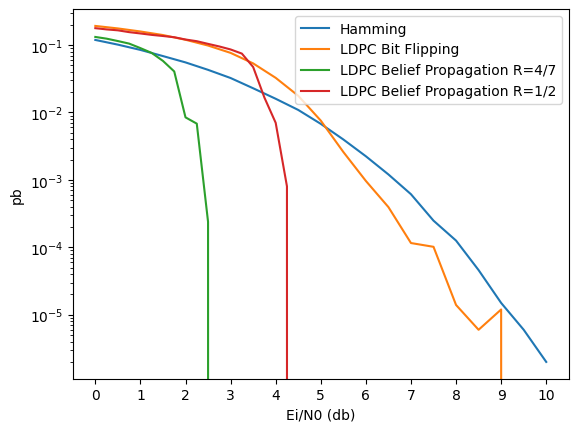

In [63]:
plt.plot(snrs_db, hamming_errors)
plt.plot(snrs_db, ldpc_bitflipping_errors)
plt.plot(snr_db_values_Ei, ldpc_belief_errors)
plt.plot(snr_db_values_Ei, ldpc_belief_errors_new)
plt.yscale("log")
plt.legend(["Hamming", "LDPC Bit Flipping", "LDPC Belief Propagation R=4/7", "LDPC Belief Propagation R=1/2"], loc="upper right")
plt.xlabel("Ei/N0 (db)")
plt.ylabel("pb")
plt.xticks(np.arange(0, 11, 1))